<a href="https://colab.research.google.com/github/SriVarshan733/ADS-A2-5537/blob/main/23075537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset with dayfirst=True
data = pd.read_csv('3airline.csv', parse_dates=['Date'], dayfirst=True)
data.head()

,Date,Number,Price
0,2021-01-01,4.6707,45.19
1,2021-01-02,4.8544,45.30
2,2021-01-03,2.8823,44.16
3,2021-01-04,5.6255,45.74
4,2021-01-05,8.3329,47.30


**2. FOURIER TRANSFORM**

In [2]:

# Extract the daily passenger numbers
passenger_numbers = data['Number'].values

# Perform Fourier Transform
fourier_transform = np.fft.fft(passenger_numbers)
frequencies = np.fft.fftfreq(len(passenger_numbers))

**3. BAR CHART**

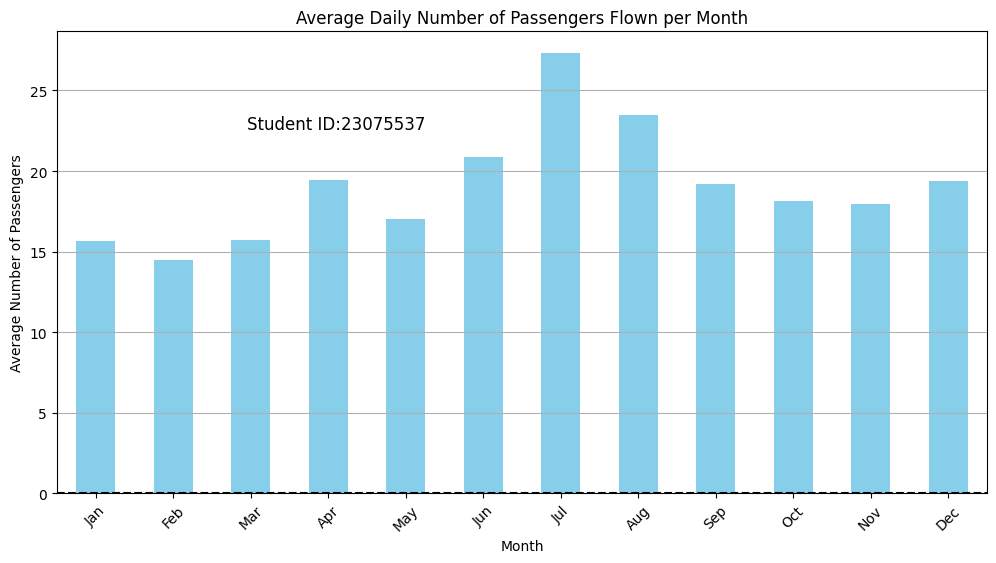

In [3]:

# Group by month and calculate average
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Number'].mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Daily Number of Passengers Flown per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Passengers')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.text(0.3, 0.8, 'Student ID:23075537', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(axis='y')
plt.show()

**4. CALCULATING THE FOURIER SERIES APPROXIMANTION**

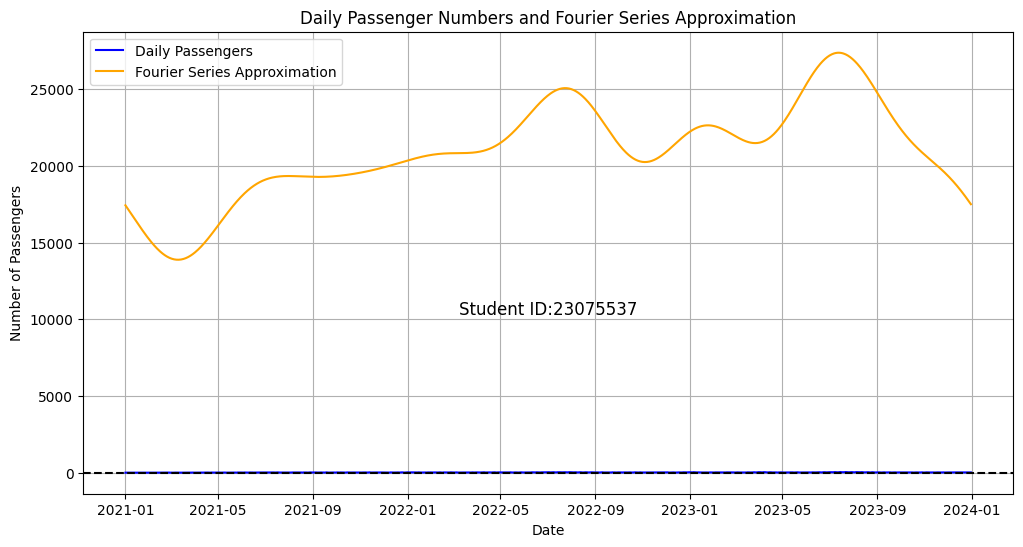

In [4]:
# Calculate the Fourier series approximation
n_terms = 8
t = np.arange(len(passenger_numbers))
fourier_series = np.zeros(len(passenger_numbers))

for k in range(n_terms):
    fourier_series += (fourier_transform[k] * np.exp(2j * np.pi * frequencies[k] * t)).real

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], passenger_numbers, label='Daily Passengers', color='blue')
plt.plot(data['Date'], fourier_series, label='Fourier Series Approximation', color='orange')
plt.title('Daily Passenger Numbers and Fourier Series Approximation')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.axhline(y=0, color='k', linestyle='--')
plt.text(0.5, 0.4, 'Student ID:23075537', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.grid()
plt.show()

**5. POWER SPECTRUM**

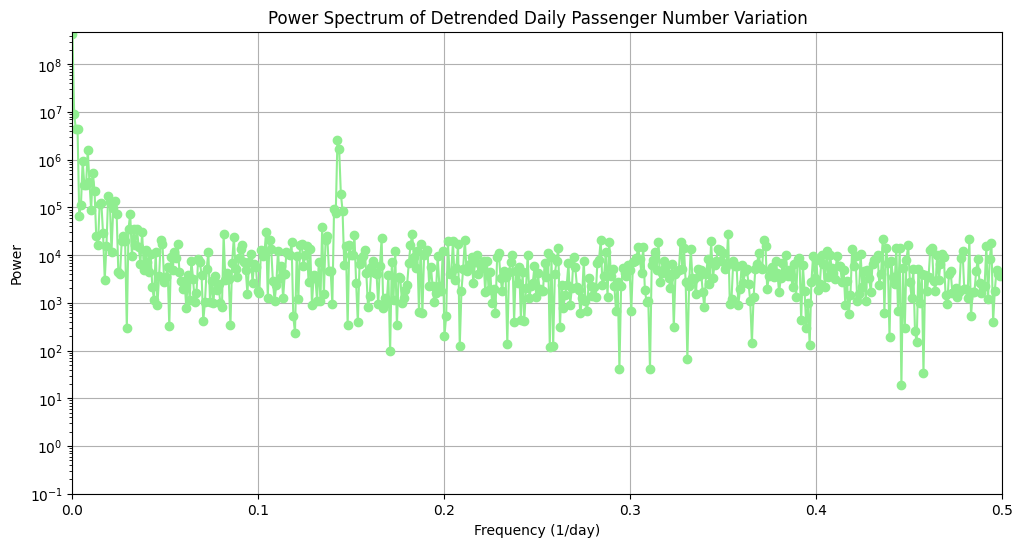

In [5]:
# Power Spectrum Calculation (Magnitude squared of the Fourier coefficients)
power_spectrum = np.abs(fourier_transform) ** 2

# Get only the positive frequencies (and their corresponding power values)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_power_spectrum = power_spectrum[:len(power_spectrum)//2]

# Plotting the power spectrum with a logarithmic scale for better visibility
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_power_spectrum, color='lightgreen', marker='o', linestyle='-')
plt.title('Power Spectrum of Detrended Daily Passenger Number Variation')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Power')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid()

# Log scale to reveal smaller variations
plt.yscale('log')

# Zoom into a specific frequency range for better visualization
plt.xlim(0, 0.5)  # Adjust based on the expected frequency components in your data
plt.ylim(0.1, np.max(positive_power_spectrum) * 1.1)  # Adjust to show power variations

plt.show()


**6. CALCULATING THE TOTAL REVENUE AND PASSENGERS FROM AUTUMN**

In [6]:


# Assuming 'data' is your DataFrame and it has a 'Date' column
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Month'] = data['Date'].dt.month  # Extract month from 'Date'

# Define autumn months
autumn_months = [9, 10, 11]

# Calculate total passengers and revenue
total_passengers = data['Number'].sum()
autumn_passengers = data[data['Month'].isin(autumn_months)]['Number'].sum()

# Calculate total revenue and autumn revenue
total_revenue = total_passengers * data['Price'].mean()
autumn_revenue = data[data['Month'].isin(autumn_months)]['Number'].sum() * data[data['Month'].isin(autumn_months)]['Price'].mean()

# Calculate fractions
X = (autumn_revenue / total_revenue) * 100  # Revenue fraction
Y = (autumn_passengers / total_passengers) * 100  # Passengers fraction


print(f"Fraction of Revenue from Autumn Months (X): {X:.2f}%")
print(f"Fraction of Passengers from Autumn Months (Y): {Y:.2f}%")

Fraction of Revenue from Autumn Months (X): 23.91%
Fraction of Passengers from Autumn Months (Y): 24.08%


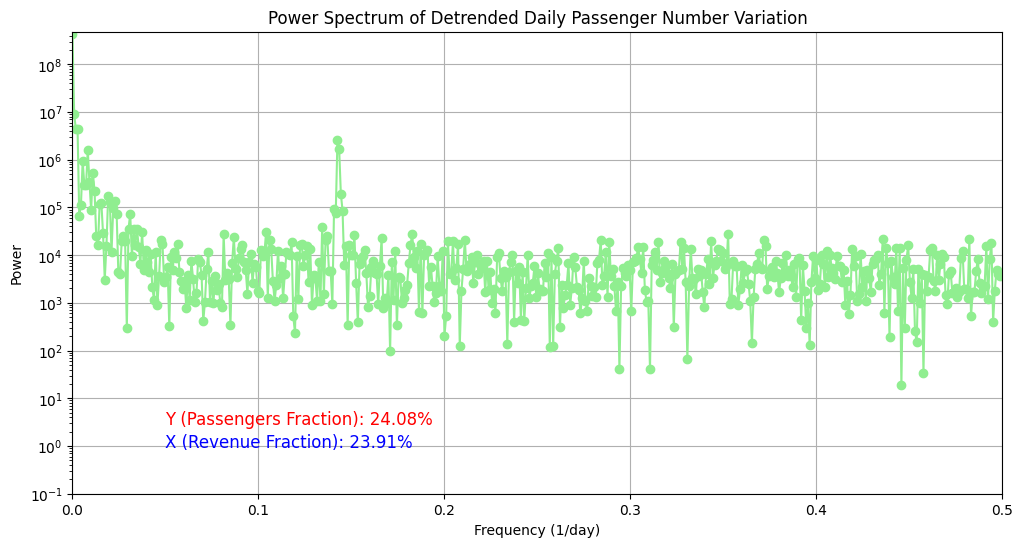

In [7]:
# Power Spectrum Calculation (Magnitude squared of the Fourier coefficients)
power_spectrum = np.abs(fourier_transform) ** 2

# Get only the positive frequencies (and their corresponding power values)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_power_spectrum = power_spectrum[:len(power_spectrum)//2]

# Plotting the power spectrum with a logarithmic scale for better visibility
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_power_spectrum, color='lightgreen', marker='o', linestyle='-')
plt.title('Power Spectrum of Detrended Daily Passenger Number Variation')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Power')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid()

# Log scale to reveal smaller variations
plt.yscale('log')

# Zoom into a specific frequency range for better visualization
plt.xlim(0, 0.5)  # Adjust based on the expected frequency components in your data
plt.ylim(0.1, np.max(positive_power_spectrum) * 1.1)  # Adjust to show power variations

# Annotate X and Y values on the plot
plt.annotate(f'X (Revenue Fraction): {X:.2f}%', xy=(0.1, 0.1), xycoords='axes fraction', fontsize=12, color='blue')
plt.annotate(f'Y (Passengers Fraction): {Y:.2f}%', xy=(0.1, 0.15), xycoords='axes fraction', fontsize=12, color='red')

plt.show()